In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/diabetes_data.csv', index_col='Patient number')
df.head(10)

ValueError: Index Patient number invalid

In [ ]:
# prompt: Create a summary table with code that is only 2 decimal places

df.describe().round(2)


,Cholesterol,Glucose,HDL Chol,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip
count,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00
mean,207.23,107.34,50.27,46.77,65.95,177.41,28.78,137.13,83.29,37.87,42.99
std,44.67,53.80,17.28,16.44,3.92,40.41,6.60,22.86,13.50,5.76,5.66
min,78.00,48.00,12.00,19.00,52.00,99.00,15.20,90.00,48.00,26.00,30.00
25%,179.00,81.00,38.00,34.00,63.00,150.25,24.10,122.00,75.00,33.00,39.00
50%,203.00,90.00,46.00,44.50,66.00,173.00,27.80,136.00,82.00,37.00,42.00
75%,229.00,107.75,59.00,60.00,69.00,200.00,32.28,148.00,90.00,41.00,46.00
max,443.00,385.00,120.00,92.00,76.00,325.00,55.80,250.00,124.00,56.00,64.00


In [ ]:
#Convert categorical data to numberic values
df['Gender'] = df['Gender'].replace({'male': 0, 'female': 1})

In [ ]:
#setup data features and targets and  setup training and testing datasets
features = df.drop('Diabetes', axis=1)
targets = df['Diabetes']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [ ]:
#run a decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.826530612244898


In [ ]:
#measure the depth of the tree
dt.get_depth()

7

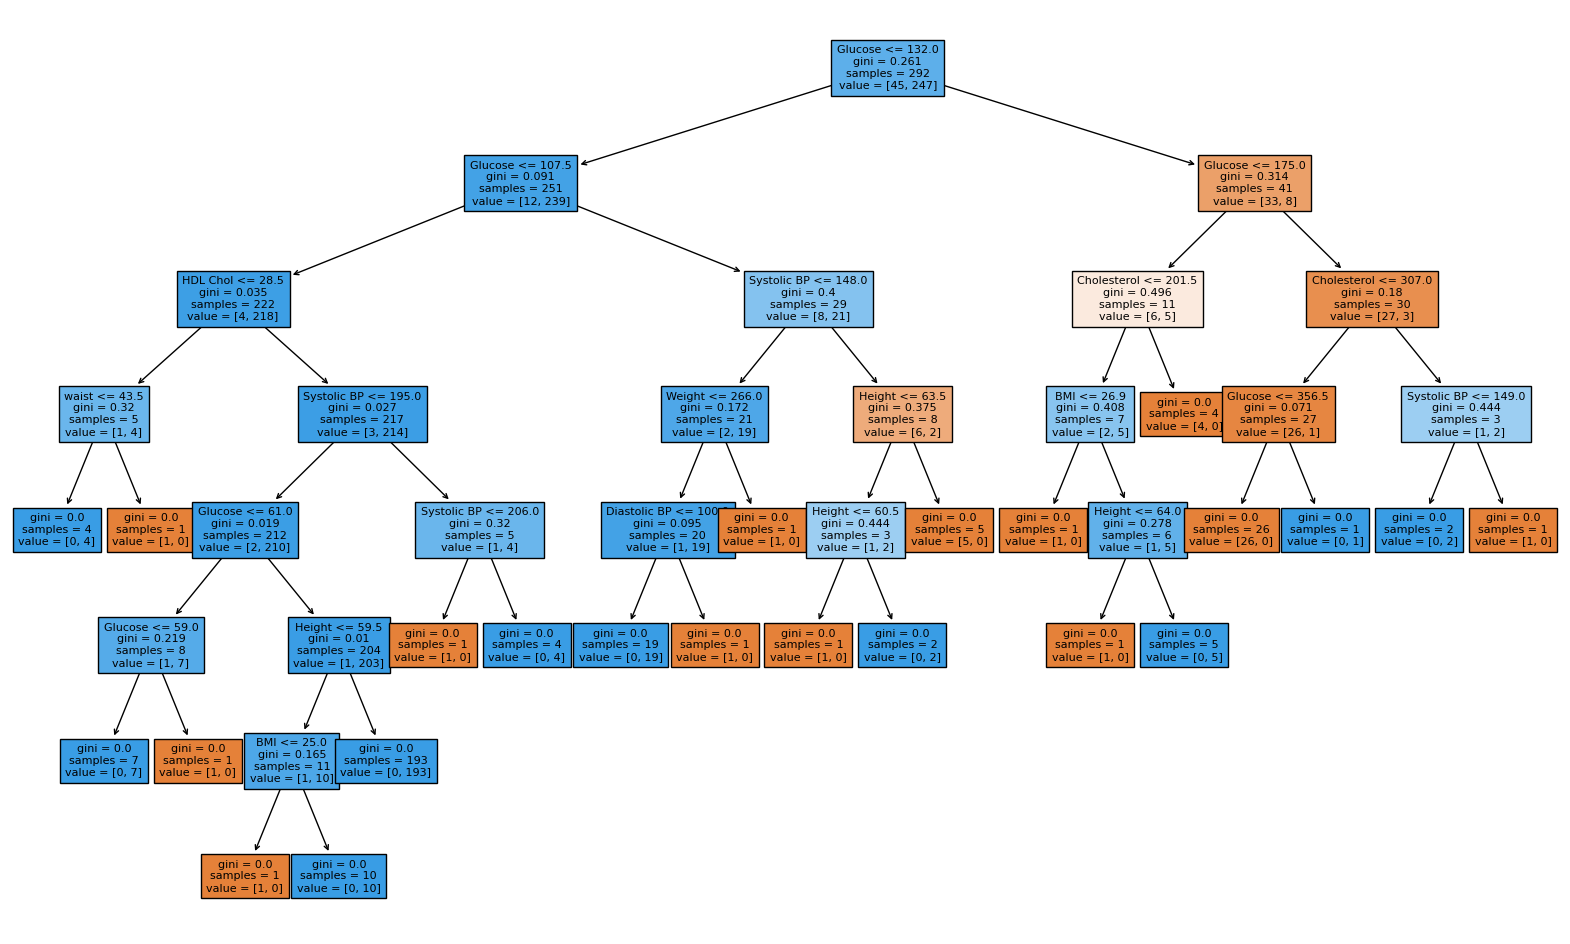

In [ ]:
# Setting up the figure size
f = plt.figure(figsize=(20, 12))

# plot_tree() now requires the feature_names to be passed as a list
#_ = plot_tree(dt, fontsize=8,feature_names=features.columns, filled=True)
_ = plot_tree(dt, fontsize=8,feature_names=features.columns.tolist(), filled=True)

In [ ]:
#create a decision tree with a max depth of 2
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9315068493150684
0.9081632653061225


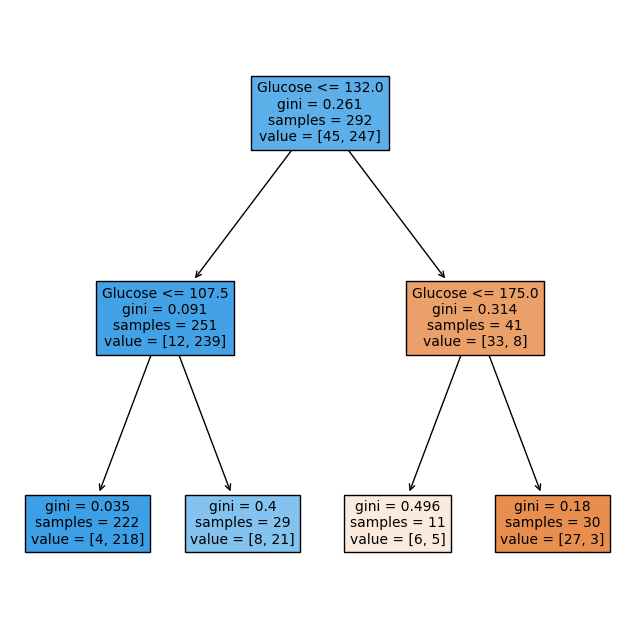

In [ ]:
#create a decision tree with a max depth of 2
f = plt.figure(figsize=(8, 8))
_ = plot_tree(dt, fontsize=10, feature_names=features.columns.tolist(), filled=True)

In [ ]:
import seaborn as sns

<ipython-input-22-d605e6a2d535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

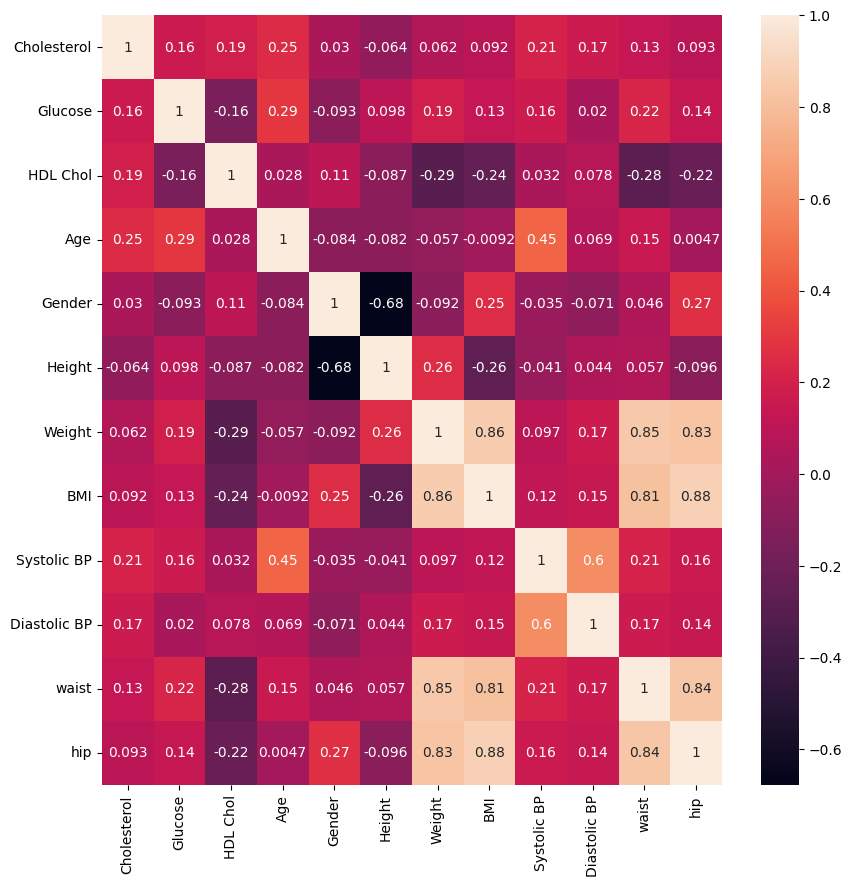

In [ ]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# prompt: Run a monte carlo simulation on the dataset

import random

# Set the number of simulations
num_simulations = 1000

# Initialize a list to store the results
simulation_results = []

# Loop through the number of simulations
for i in range(num_simulations):
  # Create a copy of the original dataset
  simulated_df = df.copy()

  # Shuffle the target column
  simulated_df['Diabetes'] = random.sample(list(simulated_df['Diabetes']), len(simulated_df))

  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(simulated_df.drop('Diabetes', axis=1), simulated_df['Diabetes'], stratify=simulated_df['Diabetes'], random_state=42)

  # Train a decision tree on the training set
  dt = DecisionTreeClassifier()
  dt.fit(x_train, y_train)

  # Calculate the accuracy of the model on the testing set
  accuracy = dt.score(x_test, y_test)

  # Store the accuracy in the list
  simulation_results.append(accuracy)

# Calculate the average accuracy across all simulations
average_accuracy = sum(simulation_results) / len(simulation_results)

# Print the average accuracy
print(f"Average accuracy after {num_simulations} simulations: {average_accuracy}")


NameError: name 'df' is not defined

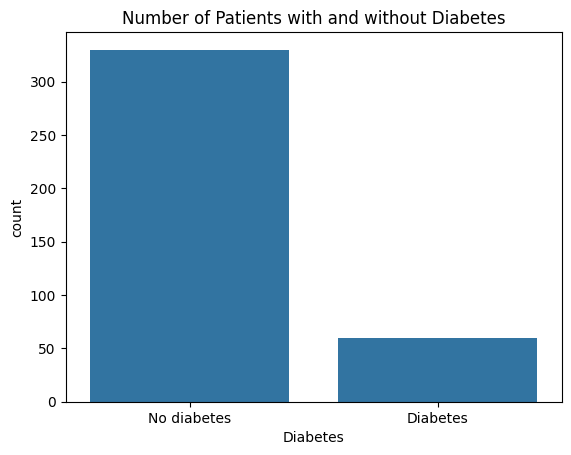

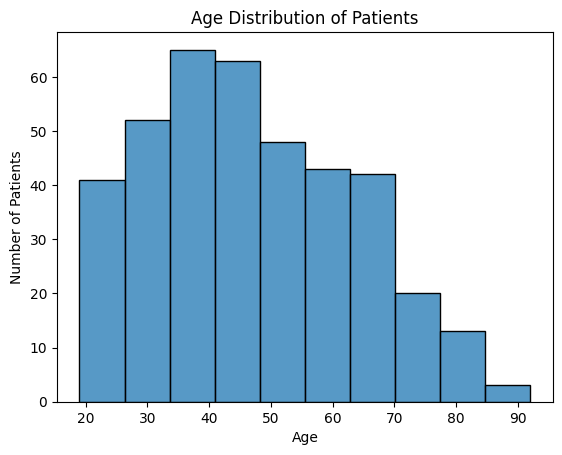

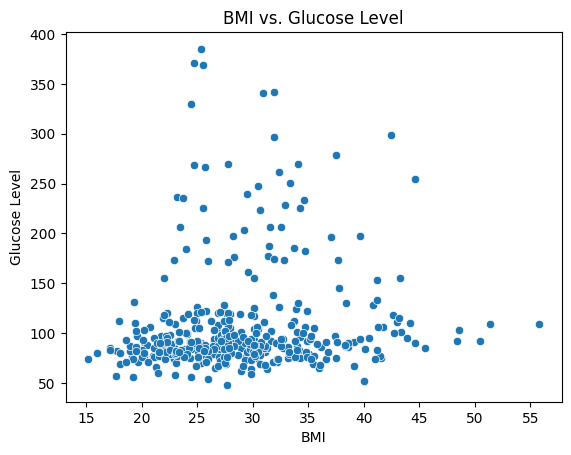

In [ ]:
# prompt: create different 3 charts and include the python code

# Bar chart of the number of patients with and without diabetes
sns.countplot(x='Diabetes', data=df)
plt.title('Number of Patients with and without Diabetes')
plt.show()

# Histogram of the age distribution
sns.histplot(x='Age', data=df, bins=10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

# Scatter plot of BMI vs. Glucose Level
sns.scatterplot(x='BMI', y='Glucose', data=df)
plt.title('BMI vs. Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.show()


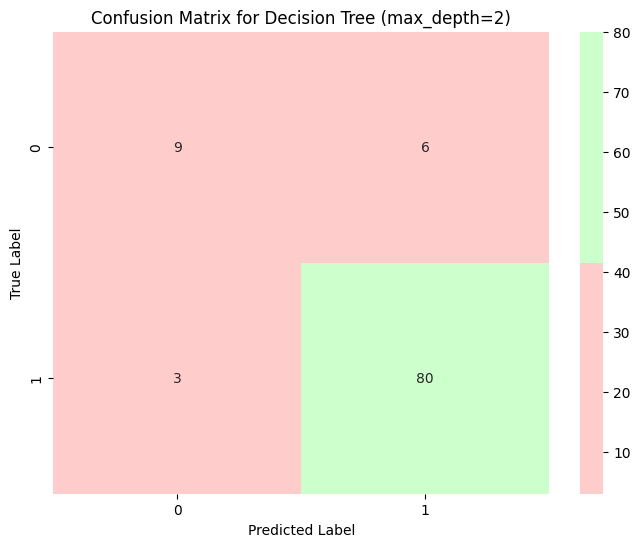

Description of the results:
- The diagonal elements of the confusion matrix represent the number of correctly classified instances.
- The off-diagonal elements represent the number of misclassified instances.
- The first row corresponds to the negative class (no diabetes) and the second row corresponds to the positive class (diabetes).
- The first column corresponds to the negative predictions and the second column corresponds to the positive predictions.


In [ ]:
# prompt: create a confusion matrix based on the decision tree with colors and a description of the results

from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred = dt.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the colors for the confusion matrix
colors = ['#ffcccc', '#ccffcc']

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=colors)

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree (max_depth=2)')

# Display the plot
plt.show()

# Print the description of the results
print('Description of the results:')
print('- The diagonal elements of the confusion matrix represent the number of correctly classified instances.')
print('- The off-diagonal elements represent the number of misclassified instances.')
print('- The first row corresponds to the negative class (no diabetes) and the second row corresponds to the positive class (diabetes).')
print('- The first column corresponds to the negative predictions and the second column corresponds to the positive predictions.')

